In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
def plot_distances(ideal_distances, real_distances):
    fig, ax = plt.subplots()
    
    ax.plot(ideal_distances)
    ax.plot(real_distances)
    
    plt.show()

def scatter_points(ideal_points, real_points):
    fig, ax = plt.subplots(figsize=(10,10))
    
    ax.set_xlim([-40,40])
    ax.set_ylim([-40,40])

    ax.plot(ideal_points[0], ideal_points[1])
    ax.plot(real_points[0], real_points[1])
    
    plt.show()
    
def visualise_error(ideal_points, real_points):
    fig, ax = plt.subplots(figsize=(6,6))
    
    ax.set_xlim([8,30])
    ax.set_ylim([8,30])
    
    ideal_distances = coords_to_distances(ideal_coords)
    real_distances = coords_to_distances(real_coords)
    
    under_added = False
    over_added = False
    
    for i in range(360):
        if ideal_distances[i] > real_distances[i]:
            ax.plot([0,real_points[0][i]], [0,real_points[1][i]], color='green')
            if not under_added:
                ax.plot([real_points[0][i], ideal_points[0][i]], [real_points[1][i], ideal_points[1][i]], color='magenta', label='Undershot value')
                under_added = True
            else:
                ax.plot([real_points[0][i], ideal_points[0][i]], [real_points[1][i], ideal_points[1][i]], color='magenta')
        else:
            ax.plot([0,ideal_points[0][i]], [0,ideal_points[1][i]], color='green')
            if not over_added:
                ax.plot([ideal_points[0][i], real_points[0][i]], [ideal_points[1][i], real_points[1][i]], color='red', label='Overshot value')
                over_added = True
            else:
                ax.plot([ideal_points[0][i], real_points[0][i]], [ideal_points[1][i], real_points[1][i]], color='red')

    ax.plot(ideal_points[0], ideal_points[1], color='black', label='Ground truth')
    ax.plot(real_points[0], real_points[1], color='blue', label='Estimation')
    
    ax.set_xlabel(r'Distance (cm)', fontsize=11)
    ax.set_ylabel(r'Distance (cm)', fontsize=11)
    ax.legend(frameon=False)
 
    fig.savefig("error_visualisation.pdf", bbox_inches='tight')
    
    plt.show()

In [4]:
def ideal_box_distances(radius):
    # Hypotenuse = radius / cos(theta)
    first_45  = np.full(46, radius) / np.cos(np.radians(np.arange(46)))
    second_45 = np.flip(first_45, axis=0)[1:]
    ninety = np.concatenate((first_45, second_45), axis=None)
    trimmed_ninety = ninety[1:]
    return np.concatenate((ninety, trimmed_ninety, trimmed_ninety, trimmed_ninety[:-1]), axis=None)

In [5]:
def distances_to_coords(distances, center):
    x_coords = center[0] + (distances * np.sin(np.radians(np.arange(360))))
    y_coords = center[1] + (distances * np.cos(np.radians(np.arange(360))))
    return x_coords, y_coords

def coords_to_distances(coords):
    return np.sqrt(coords[0]**2 + coords[1]**2)

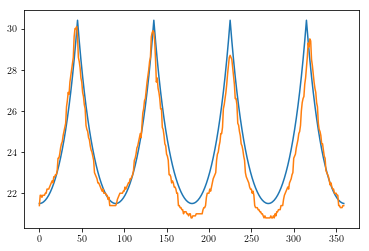

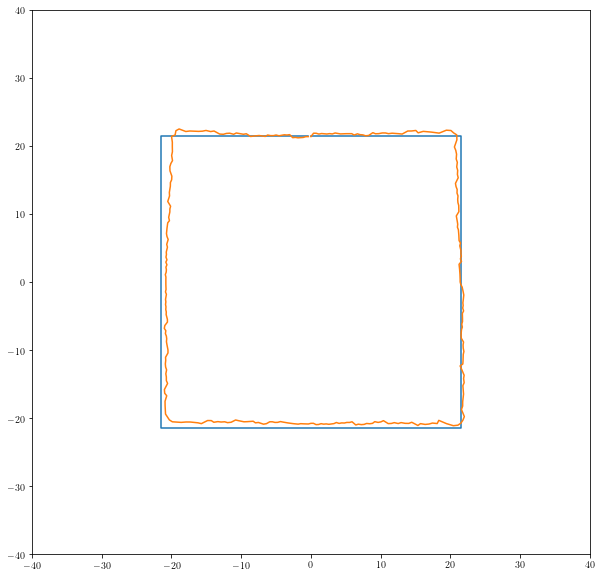

In [6]:
# real_distances = np.array([274,288,297,274,270,243,259,256,256,259,259,259,262,263,263,267,267,268,272,253,274,278,278,288,287,294,298,303,308,308,314,319,324,326,340,337,342,348,356,354,360,368,368,375,395,395,403,395,358,384,375,368,371,362,356,348,348,342,337,337,331,324,319,314,311,309,303,298,298,283,294,288,278,278,260,274,276,270,258,251,267,268,263,263,263,263,267,272,294,294,314,313,319,306,288,278,270,253,245,263,265,262,267,267,272,270,270,276,276,277,278,290,288,294,298,298,303,308,308,314,319,328,324,331,337,342,342,348,356,337,362,366,375,388,398,398,395,395,388,375,377,368,368,368,368,371,362,362,354,348,337,330,319,319,308,308,303,281,298,294,288,278,277,274,276,274,273,270,273,269,268,267,263,263,263,268,270,274,278,277,284,278,284,262,277,270,262,263,263,263,263,263,267,268,267,250,270,272,274,276,278,278,288,288,292,297,295,303,311,313,321,324,335,356,375,395,420,428,420,413,395,388,375,375,375,388,398,395,398,388,375,375,368,362,362,354,348,342,339,337,330,326,297,314,292,291,303,297,298,295,294,288,278,278,274,274,270,272,272,265,267,264,263,263,263,265,263,250,267,288,308,337,324,297,278,269,270,263,259,259,263,263,263,267,263,267,268,270,272,274,274,278,278,288,297,294,295,298,306,308,314,313,326,324,324,331,337,352,356,356,356,360,368,375,375,388,395,395,398,388,382,384,368,335,354,348,350,344,333,331,306,324,319,314,308,313,301,300,292,290,288,278,277,270,270,267,267,263,263,263,259,259,256,256,256,250,252,252,238,252])

# real_distances = np.array([99,100,101,100,101,102,101,102,102,107,107,109,109,110,111,110,113,114,115,115,118,119,120,126,128,130,132,136,131,139,140,149,151,149,158,162,165,169,174,183,188,192,195,201,202,200,194,187,183,172,169,164,160,157,152,142,139,137,136,132,128,127,121,118,116,112,113,110,110,108,102,102,100,96,99,97,97,96,95,95,94,94,93,89,88,90,88,88,89,87,88,88,88,87,88,88,88,89,93,94,95,94,96,98,97,99,99,100,99,102,107,109,110,112,113,116,114,119,125,128,126,134,139,140,140,151,154,159,162,167,166,181,184,185,183,181,171,163,160,156,152,142,139,136,133,131,128,120,118,115,113,107,109,107,107,100,99,99,96,94,92,93,90,87,88,86,85,86,82,84,83,83,82,82,82,82,82,78,78,82,78,78,82,79,82,82,82,82,83,83,84,84,85,86,86,87,87,85,93,93,94,97,97,98,101,101,102,109,111,114,115,117,120,126,128,126,129,138,140,147,154,159,165,169,174,181,183,183,175,170,167,162,157,154,151,142,140,137,134,131,129,126,120,118,116,112,112,112,110,109,107,102,101,100,99,98,97,96,96,94,94,94,93,93,93,93,89,88,88,88,89,88,86,89,89,89,92,93,93,94,95,95,96,97,98,99,99,101,102,107,108,110,111,114,116,116,119,126,128,130,132,135,137,138,142,152,154,157,162,165,172,174,185,192,197,199,198,197,193,187,183,172,169,166,162,157,156,151,149,141,139,137,135,133,131,129,126,120,119,119,116,115,113,112,111,110,110,108,108,108,107,102,102,102,101,101,100,101,101,101])

# real_distances = np.array([108,108,108,109,108,109,112,113,113,115,114,114,115,114,116,114,119,120,121,121,126,127,128,129,132,133,134,136,137,143,145,148,150,152,154,157,165,167,170,175,177,180,190,194,197,197,197,186,190,182,178,176,171,165,164,163,155,152,150,147,146,143,142,136,134,133,131,129,128,124,126,121,120,120,118,118,117,116,114,115,114,113,114,111,108,109,109,109,108,109,109,109,106,108,109,109,109,113,113,114,113,115,116,116,117,118,117,120,120,121,127,127,129,132,132,129,135,137,143,145,147,148,151,153,156,163,166,169,173,176,179,189,194,189,198,197,196,192,182,181,170,173,169,165,163,156,155,153,150,148,147,143,133,139,134,133,134,130,129,129,125,126,120,119,119,119,118,117,116,116,115,114,115,114,113,114,113,113,113,113,112,113,113,113,113,114,114,114,115,116,116,116,117,114,119,116,121,120,121,126,128,129,130,132,133,134,136,142,143,145,148,148,152,154,156,162,166,170,171,176,180,182,192,192,197,199,197,192,189,179,176,170,170,166,164,155,154,152,148,147,146,143,137,135,133,132,130,129,128,128,126,121,120,119,119,118,118,117,116,116,114,114,114,113,109,109,113,109,109,109,109,109,113,109,113,110,112,113,113,114,114,115,116,113,118,118,119,120,121,126,128,128,129,131,133,134,136,142,144,145,148,148,152,155,157,165,165,170,173,177,181,189,193,197,197,197,194,188,181,177,173,170,168,164,156,155,152,151,148,146,144,142,136,135,132,131,130,124,128,126,121,121,120,120,117,117,117,116,116,115,116,114,115,113,112,113,113,111,113,113])

# real_distances = np.array([134,134,135,135,135,136,136,136,136,136,137,137,142,143,139,145,145,146,147,148,150,151,152,153,154,156,157,164,165,166,169,171,175,176,178,181,189,190,196,197,203,205,208,212,216,223,228,228,226,223,214,210,206,203,199,196,192,190,182,179,177,175,166,170,169,166,163,163,156,153,153,152,150,150,148,147,145,145,144,143,142,142,137,136,133,136,136,137,152,153,164,156,151,150,148,148,144,136,136,136,136,136,137,137,137,143,143,145,140,146,146,148,150,152,155,155,156,163,164,166,169,170,173,178,178,181,191,185,196,197,203,205,208,212,216,225,227,230,228,224,217,212,206,205,201,198,194,192,182,180,178,176,175,171,169,166,160,163,157,156,154,152,152,150,148,148,147,146,145,145,144,143,142,142,142,137,137,137,136,136,136,133,136,136,136,137,136,136,139,137,142,142,143,145,144,146,146,147,148,149,151,152,152,152,155,156,157,163,165,168,169,171,173,176,180,181,189,192,194,197,201,203,208,210,214,226,230,230,231,228,223,216,210,206,203,201,197,194,182,182,179,178,174,174,164,168,166,166,163,157,155,155,152,151,150,148,148,147,146,145,143,144,137,137,136,136,136,135,135,134,129,134,134,134,134,134,134,135,137,136,133,136,136,137,137,142,143,144,144,146,147,147,148,149,150,147,153,155,156,157,164,165,170,169,173,175,180,180,182,190,194,196,202,205,206,210,206,223,223,216,213,210,207,203,199,195,194,189,180,178,171,173,170,171,166,164,157,156,155,153,151,151,148,148,145,144,143,142,137,133,136,136,135,134,133,133,133,133,132,133])

# real_distances = np.array([154,163,163,151,152,143,135,135,135,136,136,136,142,144,142,144,145,144,145,146,149,150,151,152,154,155,163,166,166,170,166,173,176,179,180,169,190,193,197,173,194,207,214,209,227,231,225,225,212,203,195,203,198,196,194,189,182,178,176,175,168,164,166,164,163,155,154,152,152,150,148,147,146,145,144,142,137,137,135,135,134,133,133,133,132,132,132,131,131,132,131,132,133,132,133,133,133,133,133,134,134,137,136,138,142,142,143,144,145,144,148,150,147,152,152,154,157,162,165,168,170,172,174,178,177,178,189,191,197,197,204,206,208,216,224,181,230,229,196,210,197,204,200,196,192,190,182,178,179,176,169,153,168,165,164,156,155,155,154,152,152,148,147,148,145,144,143,140,142,137,136,133,134,130,133,133,130,133,134,132,132,132,128,133,132,132,133,133,128,133,134,135,135,135,136,134,137,137,137,136,147,147,148,148,150,145,152,155,155,163,167,169,164,172,175,177,181,182,155,187,196,200,168,188,212,216,171,227,226,218,214,204,181,203,199,195,179,190,185,179,177,176,171,168,170,166,159,156,159,150,144,151,146,150,148,147,149,147,145,143,144,143,139,142,142,142,137,136,136,138,134,135,134,136,136,136,136,137,142,142,143,138,143,144,144,146,147,150,148,150,150,152,152,153,156,157,164,166,167,170,168,173,173,177,178,180,168,196,194,194,200,205,202,210,216,226,218,203,232,234,225,223,212,210,206,202,201,197,155,177,176,183,180,174,174,164,170,168,163,164,163,155,155,154,152,151,148,148,148,145,144,145,140,144,144,143,143,144,146,147])

# real_distances = np.array([147,151,155,155,153,148,137,135,135,135,136,136,138,137,142,143,144,144,145,146,147,148,150,151,149,154,155,163,165,166,169,170,173,176,179,181,189,190,194,199,201,205,208,212,216,228,226,224,216,203,208,205,201,199,196,192,182,181,178,175,173,170,169,167,158,157,155,153,152,152,150,148,148,146,145,143,143,137,136,136,136,135,135,133,131,133,133,133,133,133,133,133,133,130,133,134,134,134,134,135,136,136,137,136,142,142,142,144,145,146,147,148,151,152,152,154,155,156,164,167,168,168,171,176,178,179,181,188,193,196,199,203,208,210,214,223,225,228,227,216,212,208,199,201,197,193,190,174,179,177,176,173,170,168,163,164,157,156,154,152,151,150,148,149,146,145,144,143,142,142,136,136,136,134,133,133,133,133,133,133,131,133,133,133,133,134,133,132,133,133,133,131,134,136,136,136,136,137,137,143,146,146,147,148,148,150,151,152,154,157,163,164,168,169,172,175,177,179,182,190,192,196,199,203,197,210,210,224,226,222,218,212,208,204,200,197,196,192,189,181,174,177,173,171,169,166,166,164,157,155,152,153,151,150,148,144,146,146,144,143,143,142,142,137,136,136,136,136,135,135,133,134,134,135,134,135,135,135,136,136,136,136,139,142,143,143,144,145,145,147,148,148,150,151,152,153,155,156,157,164,169,167,165,171,173,176,178,181,189,183,194,196,200,205,206,210,214,225,228,230,219,218,224,216,210,207,205,201,189,194,192,189,179,178,176,173,171,170,168,166,164,157,157,155,153,152,151,148,149,148,146,146,146,144,144,143,143,144,143,143])

# real_distances = np.array([129,129,129,130,129,134,134,134,134,135,135,136,136,137,137,138,139,141,141,138,142,144,144,146,152,153,154,156,159,159,162,164,167,169,176,178,180,185,189,192,196,200,208,214,216,216,213,212,201,202,194,191,186,184,180,176,170,167,167,159,162,159,156,155,154,146,145,144,143,142,141,139,139,137,136,136,136,134,129,129,129,129,128,128,126,129,136,141,137,139,143,146,145,144,138,129,125,127,128,129,129,129,134,135,136,136,137,139,139,141,142,142,144,145,146,152,154,155,157,158,161,163,166,168,169,181,179,185,187,191,194,198,209,213,216,208,214,201,202,198,192,190,187,182,178,176,169,167,164,164,161,158,151,155,153,148,145,144,143,141,141,139,139,137,137,134,135,134,130,130,129,125,128,128,127,127,127,127,127,127,127,127,127,127,128,128,128,128,128,129,130,130,134,135,136,136,133,138,139,141,141,143,144,146,146,152,154,156,159,159,162,163,166,168,176,177,182,185,187,191,189,198,210,211,214,211,209,202,196,194,189,185,182,179,176,163,165,165,162,159,157,156,153,146,146,145,143,142,141,139,139,139,137,134,135,134,135,128,130,125,128,128,127,127,127,126,127,125,126,128,126,127,127,127,129,128,128,128,128,129,129,130,130,134,136,135,137,138,139,139,141,142,143,144,146,152,153,155,157,158,161,164,166,167,176,179,179,184,188,190,194,198,204,212,216,217,208,212,201,198,197,194,188,185,182,179,176,169,167,165,162,159,159,156,155,153,151,148,145,144,143,142,141,141,139,139,138,136,135,136,135,135,134,130,130,130,130,129,129,129])

# real_distances = np.array([127,128,127,128,128,128,128,128,128,129,128,133,134,134,135,137,137,137,138,139,140,142,142,143,144,144,146,153,153,155,157,158,162,164,166,168,175,177,182,183,185,190,193,198,196,209,213,216,215,213,209,197,196,190,187,184,182,174,175,168,166,164,161,160,157,155,154,152,145,141,143,142,141,141,138,137,137,137,136,135,134,134,133,131,129,127,128,128,127,128,128,128,127,128,128,127,128,127,128,128,133,134,134,135,136,136,137,137,138,138,138,141,141,141,142,143,144,145,152,154,156,158,161,162,164,166,168,175,176,180,181,185,189,192,196,199,209,208,214,214,211,201,197,194,191,188,184,181,178,175,170,165,164,160,159,157,155,154,151,145,143,143,142,141,141,139,138,137,137,135,135,134,134,133,129,128,128,128,128,128,126,127,128,127,128,127,127,127,127,127,128,127,129,129,129,129,133,134,134,135,135,136,137,138,140,140,141,142,144,146,150,153,154,157,158,160,163,165,168,170,176,180,183,186,191,194,199,201,211,214,211,208,200,195,191,189,184,181,179,175,167,164,162,160,159,155,154,152,152,145,145,142,141,139,140,138,137,136,136,135,131,133,128,129,128,128,128,127,127,126,127,127,126,126,127,127,126,126,126,127,127,127,127,127,126,127,128,128,129,133,134,135,136,136,137,138,138,140,140,142,143,144,145,151,152,155,155,158,162,163,165,168,168,176,181,183,186,192,194,200,209,210,211,209,202,196,192,188,183,183,179,177,169,167,164,162,160,158,156,153,150,146,144,142,141,140,139,138,137,135,134,133,129,128,128,128,126,127,127,127])

real_distances = np.array([128,129,129,129,134,134,133,134,134,134,135,135,137,137,137,138,139,140,141,140,143,143,144,144,146,152,152,154,157,159,160,163,165,167,169,177,180,184,183,189,192,195,198,201,211,215,215,216,211,201,199,196,191,189,184,182,178,176,168,166,165,162,161,158,156,155,153,151,145,144,143,142,140,140,139,138,137,136,137,135,135,135,134,134,132,133,129,129,129,129,129,129,129,129,130,132,133,134,135,135,135,135,136,136,138,137,138,139,140,140,142,142,143,144,146,151,152,154,157,158,160,162,164,162,168,174,176,180,181,185,189,192,195,199,201,211,213,214,213,209,200,189,191,186,184,181,176,176,167,166,163,159,158,154,153,151,144,144,143,140,141,140,138,138,137,135,135,129,129,128,128,127,127,125,126,126,126,125,125,124,125,125,123,123,124,124,124,124,125,125,125,125,125,125,125,125,127,128,128,129,133,135,135,135,137,136,138,140,142,143,144,145,151,154,155,158,160,164,164,167,176,178,181,184,188,193,197,201,202,201,200,196,192,188,181,181,178,169,168,165,163,159,158,156,153,151,145,143,142,141,140,138,137,137,135,136,134,129,128,128,128,127,127,126,126,125,125,124,123,124,123,123,123,123,123,123,124,123,123,124,123,125,124,126,126,127,127,127,129,129,129,132,134,135,136,137,138,137,140,141,142,144,145,152,153,154,157,159,161,164,165,168,175,179,181,182,188,191,196,201,208,206,210,209,200,197,193,189,186,184,179,177,169,166,165,163,159,159,156,153,152,146,145,144,143,141,139,140,138,137,137,135,135,135,134,134,129,129,128,128])

# real_distances = np.array([132,134,136,136,136,136,137,138,134,138,137,138,135,137,138,141,140,140,140,143,143,144,144,144,147,150,147,150,150,150,153,153,155,155,159,161,164,163,166,169,170,170,178,183,181,180,180,178,172,174,169,165,163,161,163,158,159,155,156,154,152,152,151,150,150,148,145,143,143,143,145,141,140,140,139,138,137,136,137,135,132,133,133,130,130,129,128,129,129,130,130,130,129,129,131,127,130,132,130,131,133,134,135,134,136,136,138,138,137,140,141,142,143,145,142,146,145,151,149,149,151,153,158,155,155,158,164,162,169,166,168,167,170,174,172,178,181,174,176,172,172,169,167,165,166,167,159,155,158,157,158,156,150,150,149,148,145,140,143,144,142,136,140,139,134,136,135,135,133,133,131,130,130,129,127,129,129,128,129,129,124,127,128,128,128,128,129,127,125,128,129,129,129,131,131,132,135,135,135,136,138,139,140,141,142,142,145,146,146,148,151,152,152,154,157,160,160,160,161,165,164,170,172,171,174,174,174,181,181,176,176,170,173,167,169,162,162,165,160,157,160,154,154,153,149,151,148,146,145,143,143,143,142,139,138,138,137,138,135,133,134,131,131,131,130,132,133,143,144,146,145,145,146,143,139,133,135,130,129,127,128,129,130,130,133,132,132,135,137,139,139,138,140,142,143,144,145,146,147,149,152,153,154,155,156,156,160,160,165,164,172,167,170,167,174,178,182,181,182,189,181,178,175,177,174,171,168,166,169,165,168,160,159,165,157,157,156,155,154,150,150,150,151,146,148,141,146,142,144,144,143,142,140,141,140,139,138,137,138,139])

# real_distances = np.array([139,139,139,140,139,131,138,133,139,141,140,138,143,142,143,143,144,145,146,144,146,149,148,150,152,151,147,149,155,160,156,154,157,151,151,155,156,148,154,153,151,151,150,150,152,149,158,157,153,149,154,150,152,152,159,151,155,156,149,149,151,154,149,160,152,153,150,149,148,148,147,148,138,140,143,142,140,139,139,137,138,135,136,134,134,134,131,131,132,132,134,132,133,130,133,134,132,134,134,135,135,136,129,138,135,138,139,140,140,142,143,144,146,147,150,150,149,154,151,153,152,163,151,158,154,151,153,152,154,151,155,169,152,149,153,151,153,156,161,151,166,153,157,151,155,156,155,151,170,157,154,158,155,149,152,151,148,148,147,146,144,143,141,141,139,138,137,135,135,134,134,132,134,132,131,130,131,132,130,133,130,128,128,130,129,130,127,131,126,129,128,132,131,133,131,134,135,133,136,137,140,142,141,141,144,147,146,149,141,151,151,152,149,154,159,153,151,155,149,160,155,155,159,155,151,170,157,154,155,159,157,168,159,151,156,155,151,152,154,155,151,153,152,151,146,151,151,151,150,146,144,145,147,143,139,140,139,137,136,135,135,133,134,134,133,135,137,138,153,151,150,155,156,155,152,141,133,135,132,133,133,133,133,133,134,133,137,136,138,140,140,141,140,142,145,145,146,145,150,151,152,153,152,156,152,154,165,157,155,161,158,156,167,162,161,153,152,152,159,155,160,155,161,160,151,155,159,167,161,154,157,160,153,161,158,155,154,164,153,151,153,152,152,147,148,148,148,148,147,145,144,145,145,141,140,140,140,141,140,135])

# real_distances = np.array([143,144,136,142,143,142,145,144,145,143,145,147,146,148,143,150,151,148,151,155,154,154,159,161,164,165,164,168,167,169,168,164,175,172,168,167,171,167,170,170,175,170,170,166,167,175,170,184,169,171,174,169,170,170,169,174,169,172,167,171,170,171,168,169,166,166,164,166,162,159,162,163,156,157,157,157,155,155,154,153,152,153,151,150,149,150,148,148,145,146,150,147,148,149,151,150,150,152,150,145,151,152,151,153,154,154,153,154,159,160,160,166,161,164,167,167,167,169,167,178,166,168,168,168,170,177,171,173,174,173,171,168,172,175,171,173,168,169,171,176,173,168,184,175,183,173,166,167,166,172,166,170,170,167,176,168,162,167,168,167,167,162,163,160,159,158,158,156,156,154,155,152,149,154,149,148,152,152,151,152,152,151,144,153,151,151,151,153,152,151,154,148,151,157,158,157,156,157,161,161,163,165,164,165,169,157,169,177,172,174,170,172,165,168,174,169,172,167,168,175,175,173,167,170,173,173,175,174,169,172,172,170,178,180,174,177,170,168,183,170,170,169,169,164,158,157,162,157,159,159,154,155,153,145,152,150,145,147,146,145,143,144,143,143,143,143,147,155,157,164,165,169,175,169,170,162,146,145,143,135,136,134,136,143,143,145,146,148,148,147,147,148,151,152,154,158,161,161,164,165,167,167,168,168,176,176,171,179,169,173,176,175,167,181,172,182,185,174,171,172,172,171,176,177,171,170,178,169,175,171,169,177,178,172,173,170,167,168,164,161,162,160,162,152,157,154,154,153,152,152,150,149,148,149,145,147,148,146,149,146])

# real_distances = np.array([133,134,128,132,134,131,136,134,136,136,134,137,136,138,139,140,142,141,144,145,146,147,150,150,152,150,151,150,158,152,156,163,151,153,153,152,153,156,152,154,157,155,153,153,154,166,157,151,154,156,157,151,151,153,152,153,155,154,157,152,157,157,160,152,156,151,154,149,150,147,148,142,142,145,139,141,140,140,137,140,137,139,136,134,130,135,133,128,132,132,127,133,132,133,128,132,134,134,134,135,136,138,137,137,139,140,140,141,141,143,143,143,145,150,149,151,144,156,154,159,152,152,158,157,153,158,156,154,156,156,155,153,157,152,156,159,163,153,168,159,154,168,159,151,151,162,155,155,158,158,155,160,161,157,154,153,152,153,148,145,143,144,142,143,140,141,139,139,138,133,137,137,133,134,133,133,133,132,134,133,133,128,132,133,133,133,131,131,131,132,134,134,135,136,135,138,139,140,140,138,142,142,145,147,141,148,150,148,154,153,156,156,151,156,153,154,162,154,155,157,155,155,153,154,160,157,156,159,158,154,160,157,156,159,163,162,157,153,156,157,153,157,156,155,153,151,151,148,146,145,143,140,140,139,138,138,135,133,134,133,132,134,133,131,132,131,133,139,153,153,153,153,148,150,146,141,135,132,130,130,123,131,131,131,130,133,132,134,135,135,138,138,139,138,143,143,145,146,140,146,152,153,154,155,155,155,153,154,155,155,156,158,158,158,159,155,157,156,155,158,161,157,158,156,153,157,157,155,162,155,157,158,159,157,160,158,160,153,156,155,150,152,151,150,141,147,145,145,143,143,139,137,141,141,140,140,140,132,137,136])

# real_distances = np.array([413,392,402,415,391,338,280,250,241,235,229,236,232,240,237,240,236,239,247,241,237,248,242,259,243,266,266,254,274,278,283,288,296,295,307,309,318,314,319,324,326,284,315,329,346,345,289,344,316,328,325,322,281,313,286,307,297,289,288,290,281,283,278,280,271,268,270,259,261,256,252,250,247,251,240,244,245,243,234,241,241,235,237,238,236,237,232,239,245,248,262,246,240,236,234,239,235,235,233,239,238,237,242,238,237,243,241,247,246,252,247,258,252,262,265,263,267,275,274,279,281,287,287,288,286,297,301,306,211,302,317,321,321,325,206,324,348,344,336,316,326,323,316,313,318,310,229,303,303,298,292,291,289,277,267,275,244,270,266,258,257,258,257,249,248,250,246,242,244,231,239,237,238,236,237,234,236,236,238,239,238,237,242,257,249,239,236,237,240,235,234,236,238,241,242,235,231,227,245,244,247,244,249,251,257,260,260,265,269,267,271,279,282,272,282,289,296,303,273,306,312,317,321,315,327,320,338,344,339,328,242,324,243,317,314,308,225,280,290,288,287,288,290,278,263,272,269,265,265,242,259,251,251,252,248,245,243,241,240,238,231,233,233,230,220,234,235,227,236,237,244,247,250,243,243,241,235,231,232,234,232,232,233,235,235,238,238,238,241,241,244,246,235,248,250,250,260,262,266,222,269,266,272,251,282,263,291,291,292,297,306,310,279,316,319,316,349,342,345,275,314,321,317,321,325,314,317,307,300,363,294,309,296,287,292,278,275,269,264,263,262,263,257,256,249,260,247,243,243,244,241,233,242,239,238,238,238,238,244,250])

# real_distances = np.array([206,210,202,204,201,204,210,209,213,211,205,206,211,208,204,207,203,214,212,205,205,207,207,205,204,206,204,206,204,207,209,215,207,213,216,216,208,211,215,211,206,204,210,209,208,206,211,209,211,208,207,214,207,208,210,204,207,208,207,214,209,209,226,212,206,213,206,206,207,208,212,204,203,217,210,207,206,211,213,206,208,207,205,206,213,206,209,207,207,212,217,208,211,208,209,208,207,207,207,210,203,211,207,204,210,217,206,209,207,216,209,206,212,209,210,212,208,205,206,205,209,213,203,208,204,208,206,203,208,213,206,214,209,209,210,205,213,210,208,205,206,206,208,207,214,207,208,213,215,206,207,207,212,210,214,209,208,209,212,227,209,206,211,209,214,209,215,210,208,221,213,218,215,215,209,206,207,215,211,215,209,208,209,211,208,208,213,215,210,208,206,229,219,210,207,213,213,206,226,209,212,210,220,211,209,210,212,210,217,215,209,208,209,211,214,213,205,208,207,209,207,216,208,211,207,208,209,211,209,210,213,207,205,209,208,208,210,211,210,210,209,210,208,210,212,212,209,207,208,213,211,214,208,210,207,207,206,210,208,204,208,206,213,207,208,213,209,204,209,219,209,211,222,215,212,207,221,212,208,210,208,207,207,208,210,207,208,206,211,216,208,213,211,208,222,207,208,211,210,209,217,207,210,213,212,209,210,209,214,207,206,207,212,208,209,214,211,216,214,211,214,209,210,211,211,208,212,210,218,208,206,212,211,208,213,205,219,209,219,214,211,207,208,205,210,211,211,208,211,234,214,205,211,216,209,210,210,207,210,208])

# real_distances = np.array([144,150,153,152,151,144,138,133,128,127,128,128,129,130,131,132,134,132,135,136,136,136,139,139,142,143,144,146,150,151,154,155,160,163,165,168,172,175,180,180,186,189,192,195,197,204,209,207,204,198,194,189,186,181,183,177,177,168,166,164,162,156,159,153,152,151,146,144,144,142,141,139,136,136,137,136,134,134,133,133,131,129,129,127,128,128,128,127,128,127,127,127,127,127,129,129,128,130,129,130,130,133,133,134,134,135,134,137,137,140,140,141,143,143,143,146,150,152,154,155,160,162,165,167,169,175,174,180,185,187,191,194,194,201,210,214,209,212,210,205,199,193,190,186,185,181,179,176,174,164,167,165,163,161,156,154,153,152,150,149,144,145,145,143,142,141,140,139,138,138,137,136,136,134,134,134,133,133,132,132,132,133,133,133,130,133,133,133,134,133,134,133,135,136,136,137,138,137,139,140,141,143,144,144,147,150,152,153,153,156,161,163,163,167,172,175,180,181,185,188,191,188,199,204,207,209,208,207,199,197,193,188,185,181,178,176,174,168,167,164,162,157,155,152,151,149,145,146,144,140,141,140,137,138,137,136,134,133,134,130,130,130,129,130,129,129,129,129,127,128,128,127,127,127,127,128,128,128,129,129,129,129,130,132,133,135,137,137,137,138,138,140,140,142,142,145,147,150,150,153,156,160,161,165,168,171,175,178,181,184,188,185,195,198,206,210,207,204,201,196,189,188,184,179,178,174,169,167,164,158,156,154,151,150,147,144,142,141,140,137,137,135,134,134,130,128,128,125,124,124,124,123,120,122,121,122,122,122,128,130])

real_distances = np.roll(real_distances, -3)
real_distances = real_distances/10 + 8.5
real_coords = distances_to_coords(real_distances, (0,0))

ideal_distances = ideal_box_distances(21.5)
ideal_coords = distances_to_coords(ideal_distances, (0,0))

plot_distances(ideal_distances, real_distances)
scatter_points(ideal_coords, real_coords)

In [7]:
def calc_sum_of_abs_diff(ideal_distances, real_distances):
    return np.sum(np.absolute(ideal_distances - real_distances)) / len(ideal_distances)

def calc_sum_of_over_diff(ideal_distances, real_distances):
    return np.sum(np.maximum(real_distances - ideal_distances, 0)) / len(ideal_distances)

def calc_sum_of_under_diff(ideal_distances, real_distances):
    return np.sum(np.minimum(real_distances - ideal_distances, 0)) / len(ideal_distances)

def calc_corner_weighted_sum_of_diff(ideal_distances, real_distances):
    differences = real_distances - np.roll(real_distances, -1)
    return np.sum(np.absolute(ideal_distances - real_distances) * differences * 100) / len(ideal_distances)

In [8]:
print(calc_sum_of_abs_diff(ideal_distances, coords_to_distances(real_coords)))
print(calc_sum_of_over_diff(ideal_distances, coords_to_distances(real_coords)))
print(calc_sum_of_under_diff(ideal_distances, coords_to_distances(real_coords)))
print(calc_corner_weighted_sum_of_diff(ideal_distances, coords_to_distances(real_coords)))

0.6702236445164343
0.1297236561743402
-0.5404999883420942
-1.8255382184751303


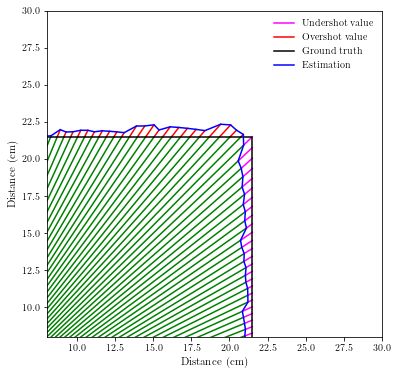

In [9]:
visualise_error(ideal_coords, real_coords)